In [14]:


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load and prepare the data
iris = load_iris(as_frame=True)
data = iris['data']
data['target'] = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

# Exploratory Data Analysis
def plot_correlations(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

def plot_pair_plots(data):
    sns.pairplot(data, hue='target', diag_kind='hist')
    plt.show()

# Data Preprocessing
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print results
    print(f"\n{model_name} Results:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

In [15]:

# Perform EDA
print("Data Shape:", data.shape)
print("\nData Summary:")
print(data.describe())

Data Shape: (150, 5)

Data Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [16]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


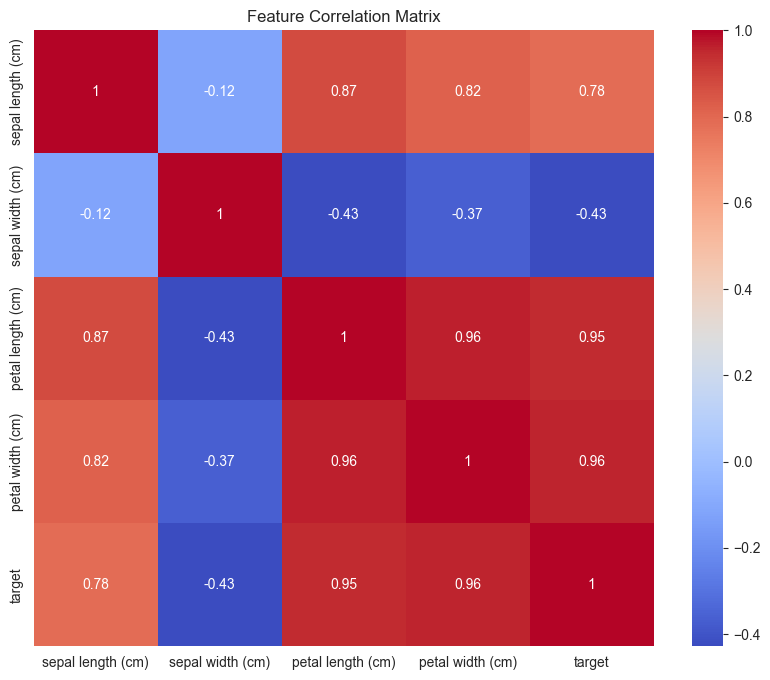

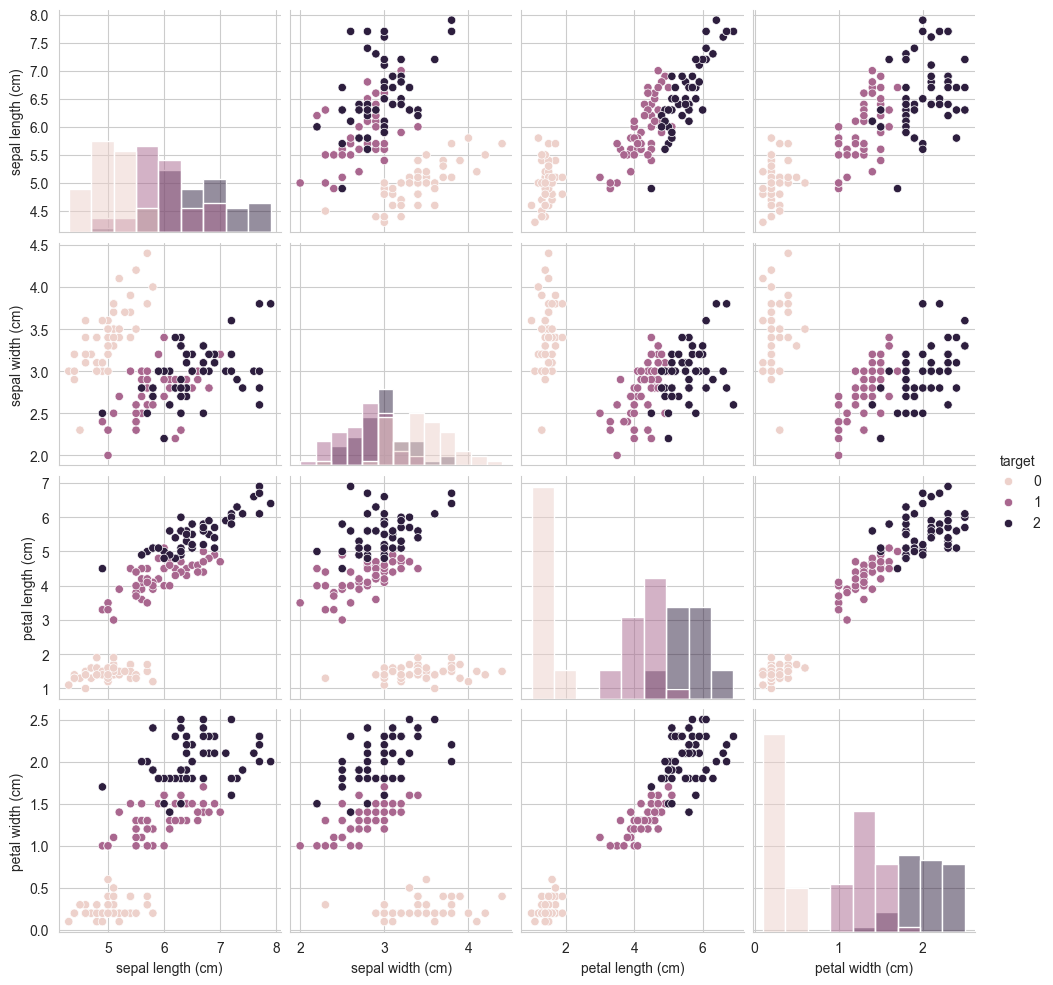

In [17]:

# Plot correlations and pair plots
plot_correlations(data)
plot_pair_plots(data)


Support Vector Machine Results:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



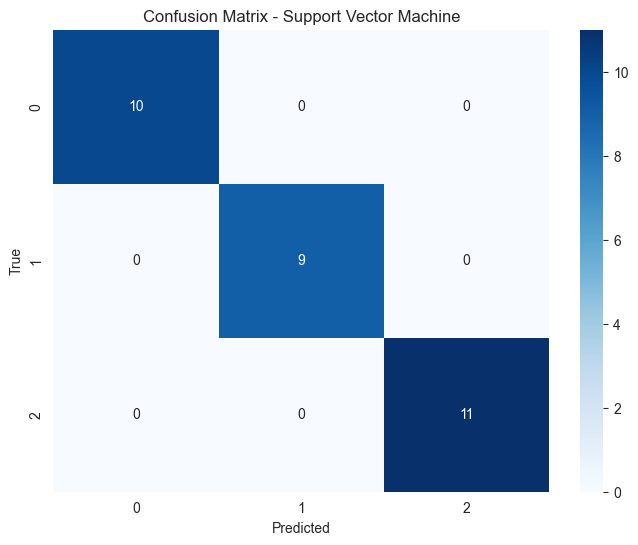

Cross-validation scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Average CV score: 0.950 (+/- 0.122)

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



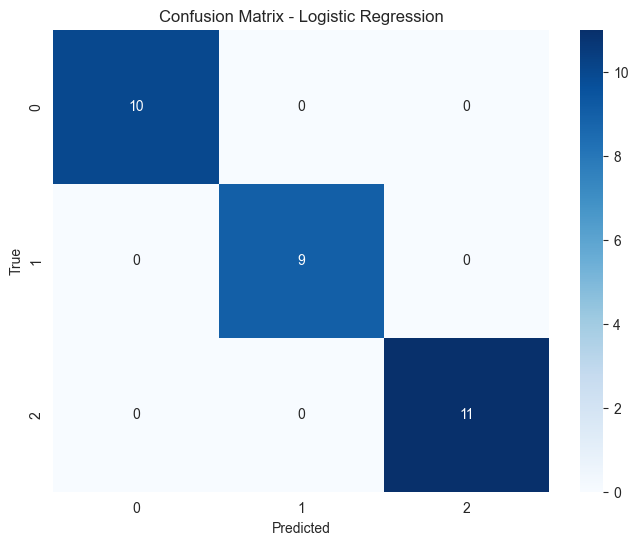

Cross-validation scores: [0.95833333 1.         0.875      1.         0.95833333]
Average CV score: 0.958 (+/- 0.091)

Naive Bayes Results:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



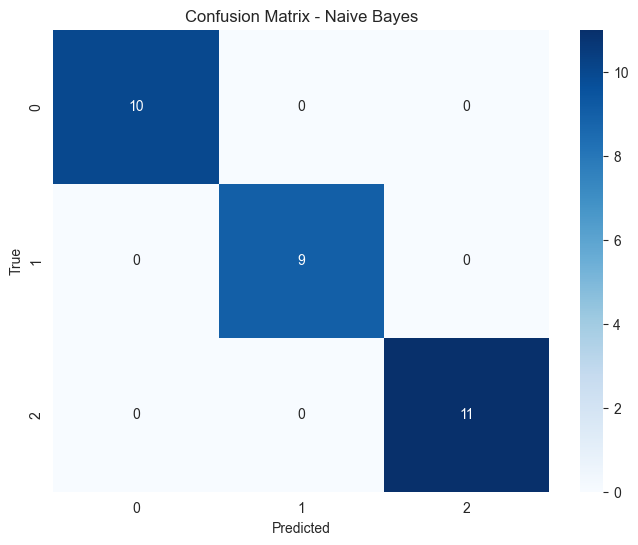

Cross-validation scores: [0.95833333 1.         0.83333333 1.         0.91666667]
Average CV score: 0.942 (+/- 0.125)

Multi-Layer Perceptron Results:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



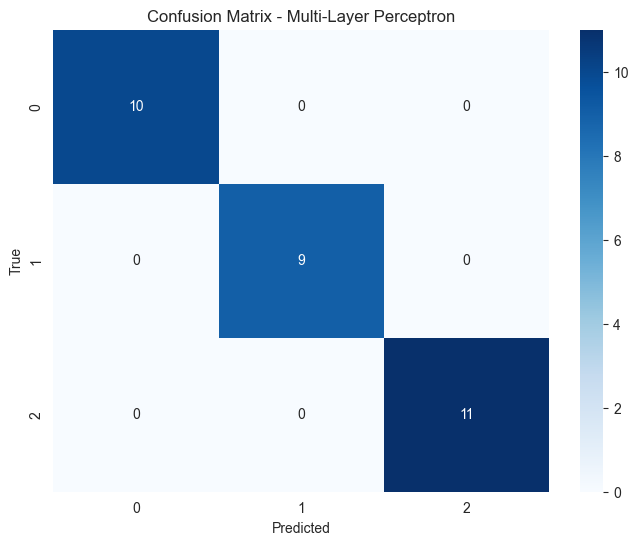

Cross-validation scores: [0.95833333 0.95833333 0.83333333 1.         0.95833333]
Average CV score: 0.942 (+/- 0.113)

Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



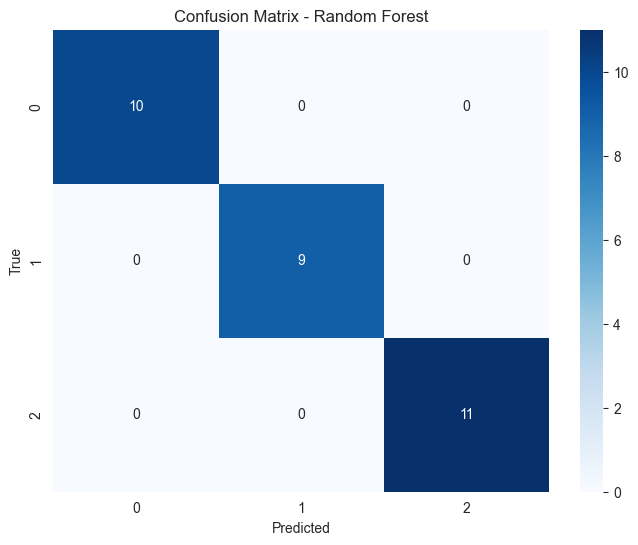

Cross-validation scores: [0.95833333 0.95833333 0.875      1.         0.95833333]
Average CV score: 0.950 (+/- 0.082)


In [18]:
# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Multi-Layer Perceptron': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=1000,
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    )
}

# Dictionary to store model performances
model_performances = {}

for model_name, model in models.items():
    # Train and evaluate each model
    model.fit(X_train_scaled, y_train)
    
    # Get predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate multiple metrics
    train_metrics = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred, average='macro'),
        'recall': recall_score(y_train, y_train_pred, average='macro'),
        'f1': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred, average='macro'),
        'recall': recall_score(y_test, y_test_pred, average='macro'),
        'f1': f1_score(y_test, y_test_pred, average='macro')
    }
    
    # Cross validation (using accuracy by default)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Store performance metrics
    model_performances[model_name] = {
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # Individual model evaluation
    train_and_evaluate_model(
        model, 
        X_train_scaled, 
        X_test_scaled, 
        y_train, 
        y_test, 
        model_name
    )

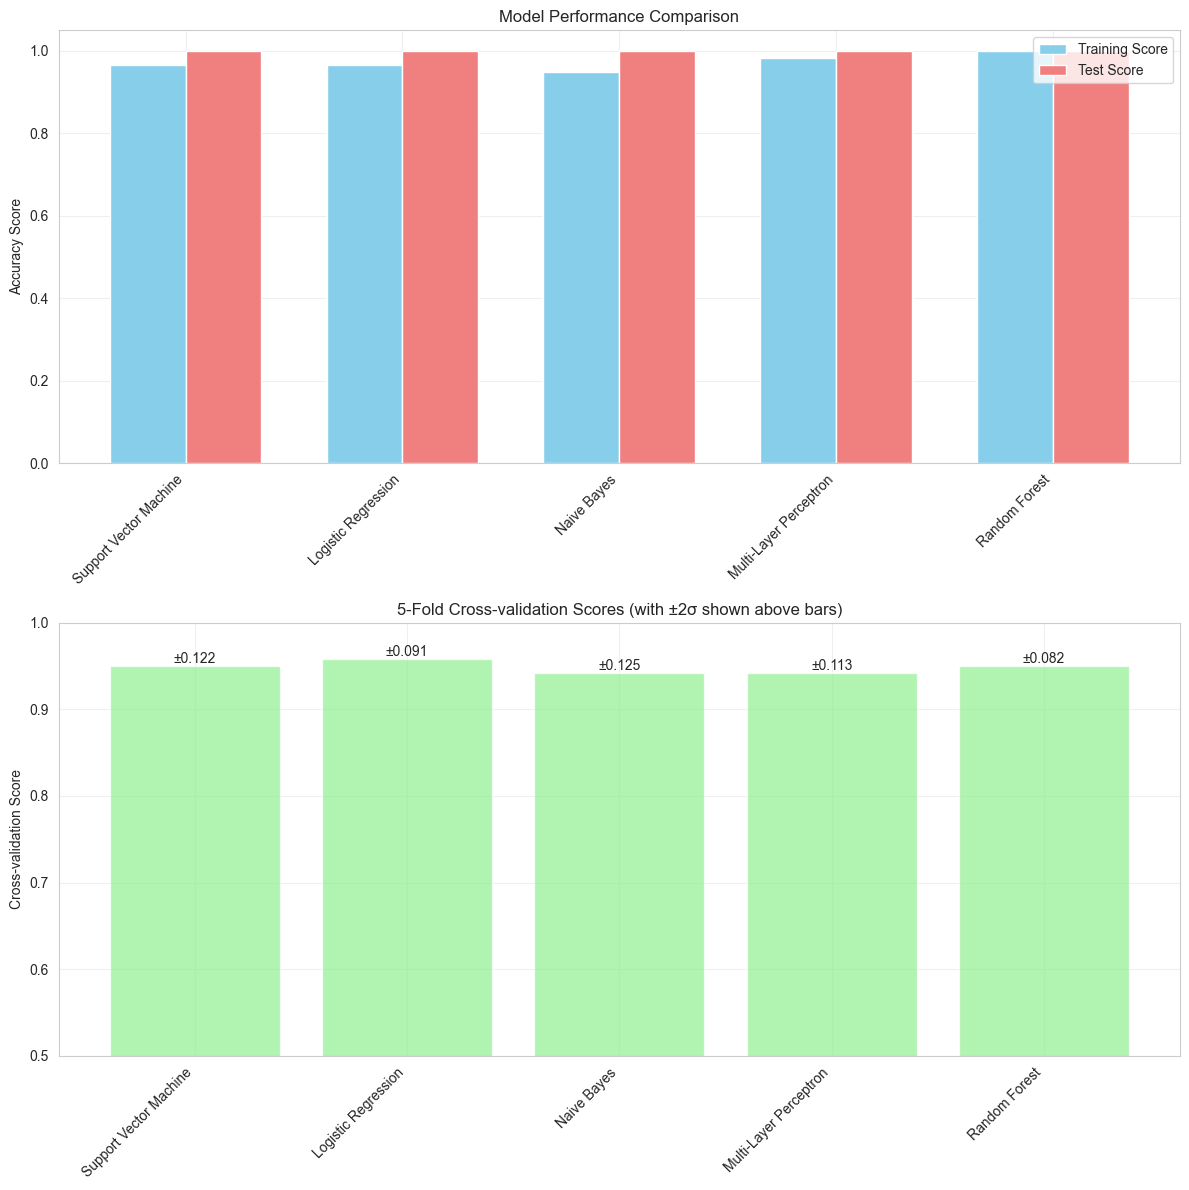


Model Performance Summary:
----------------------------------------------------------------------------------------------------
Model                Metric          Train       Test    CV Mean     CV Std
----------------------------------------------------------------------------------------------------
Support Vector Machine accuracy        0.967      1.000       0.95 0.06123724356957944
                     precision       0.967      1.000          -          -
                     recall          0.967      1.000          -          -
                     f1              0.967      1.000          -          -
Logistic Regression  accuracy        0.967      1.000 0.9583333333333334 0.045643546458763846
                     precision       0.967      1.000          -          -
                     recall          0.967      1.000          -          -
                     f1              0.967      1.000          -          -
Naive Bayes          accuracy        0.950      1.000 0.9

In [20]:
# Create performance comparison visualizations
def plot_model_comparison(model_performances):
    # Prepare data for plotting
    models = list(model_performances.keys())
    train_scores = [perf['train_metrics']['accuracy'] for perf in model_performances.values()]
    test_scores = [perf['test_metrics']['accuracy'] for perf in model_performances.values()]
    cv_means = [perf['cv_mean'] for perf in model_performances.values()]
    cv_stds = [perf['cv_std'] for perf in model_performances.values()]
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Common x-axis positions for both plots
    x = np.arange(len(models))
    width = 0.35
    
    # Bar plot for train vs test scores
    ax1.bar(x - width/2, train_scores, width, label='Training Score', color='skyblue')
    ax1.bar(x + width/2, test_scores, width, label='Test Score', color='lightcoral')
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_title('Model Performance Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Cross-validation scores
    ax2.bar(x, cv_means, alpha=0.7, color='lightgreen')
    
    # Add text annotations for standard deviation
    for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
        ax2.text(i, mean, f'±{std*2:.3f}', ha='center', va='bottom')
        
    ax2.set_ylabel('Cross-validation Score')
    ax2.set_title('5-Fold Cross-validation Scores (with ±2σ shown above bars)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    # Set y-axis to start from 0.5 for better visualization of differences
    ax2.set_ylim(0.5, 1.0)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\nModel Performance Summary:")
    print("-" * 100)
    print(f"{'Model':<20} {'Metric':<10} {'Train':>10} {'Test':>10} {'CV Mean':>10} {'CV Std':>10}")
    print("-" * 100)
    
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for model_name, perf in model_performances.items():
        for metric in metrics:
            print(f"{model_name if metric=='accuracy' else '':20} "
                  f"{metric:<10} "
                  f"{perf['train_metrics'][metric]:>10.3f} "
                  f"{perf['test_metrics'][metric]:>10.3f} "
                  f"{perf['cv_mean'] if metric=='accuracy' else '-':>10} "
                  f"{perf['cv_std'] if metric=='accuracy' else '-':>10}")

# Generate comparison plots and summary
plot_model_comparison(model_performances)